In [1]:
import cv2
import pickle

import matplotlib.pyplot as plt

from adaboost import *
from image_utils import *

%matplotlib inline

In [5]:
weak_classifiers = pickle.load(open("./results/weak_classifiers.pkl", 'rb'))
alpha_sum = sum(w["alpha"] for w in weak_classifiers)

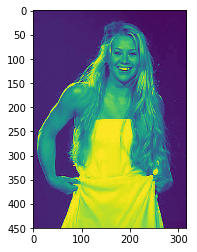

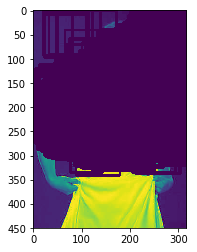

In [8]:
def plot_img(img):
    plt.imshow(img)
    plt.show()
    return    

img = cv2.imread("/Users/ateendraramesh/Documents/img_816.jpg", 0)
plot_img(img)

shape = img.shape
ii = integral_image(img)

sizes = np.arange(1, 5, 1.25) * 19.

for size in sizes:
    scale = size / 19.
    for i in range(shape[0] - int(size)):
        for j in range(shape[1] - int(size)):
            img_patch = ii[i: i + int(size), j: j + int(size)]
            pred = []
            weak_classifiers = pickle.load(open("./results/weak_classifiers.pkl", 'rb'))
            for w_c in weak_classifiers:
                f = None
                f_shape, boxes = w_c["feature_context"]

                for b in range(len(boxes)):
                    boxes[b].l, boxes[b].b = int(boxes[b].l * scale), int(boxes[b].b * scale)
                try:
                    if f_shape == [2, 1]:
                        f1 = get_integral_sum_box(ii, box(i, j, boxes[0].l, boxes[0].b))
                        f2 = get_integral_sum_box(ii, box(i + boxes[1].l, j, boxes[1].l, boxes[1].b))
                        f = f1 - f2

                    if f_shape == [1, 2]:
                        f1 = get_integral_sum_box(ii, box(i, j, boxes[0].l, boxes[0].b))
                        f2 = get_integral_sum_box(ii, box(i, j + boxes[1].b, boxes[1].l, boxes[1].b))
                        f = f2 - f1

                    if f_shape == [3, 1]:
                        f1 = get_integral_sum_box(ii, box(i, j, boxes[0].l, boxes[0].b))
                        f2 = get_integral_sum_box(ii, box(i + boxes[1].l, j, boxes[1].l, boxes[1].b))
                        f3 = get_integral_sum_box(ii, box(i + 2 * boxes[2].l, j, boxes[2].l, boxes[2].b))
                        f = f2 - f1 - f3

                    if f_shape == [1, 3]:
                        f1 = get_integral_sum_box(ii, box(i, j, boxes[0].l, boxes[0].b))
                        f2 = get_integral_sum_box(ii, box(i, j + boxes[1].b, boxes[1].l, boxes[1].b))
                        f3 = get_integral_sum_box(ii, box(i, j + 2 * boxes[2].b, boxes[2].l, boxes[2].b))
                        f = f2 - f1 - f3

                    if f_shape == [2, 2]:
                        f1 = get_integral_sum_box(ii, box(i, j, boxes[0].l, boxes[0].b))
                        f2 = get_integral_sum_box(ii, box(i + boxes[1].l, j, boxes[1].l, boxes[1].b))
                        f3 = get_integral_sum_box(ii, box(i, j + boxes[2].b, boxes[2].l, boxes[2].b))
                        f4 = get_integral_sum_box(ii, box(i + boxes[3].l, j + boxes[3].b, boxes[3].l, boxes[3].b))
                        f = f1 - f2 - f3 + f4
                except:
                    pass
                if f is not None:
                    parity, theta = w_c["parity"], w_c["theta"]
                    temp = 1 if parity * f < parity * theta else 0
                    pred.append(w_c["alpha"] * temp)
                else:
                    pred.append(0)
                    
            if sum(pred) >= alpha_half * 0.5:
                size = min(size, shape[0], shape[1])
                img = cv2.rectangle(img, (j, i), (j + int(size), i + int(size)), (0, 255, 0), 3)
plot_img(img)